<a href="https://colab.research.google.com/github/Syilun/face_people_recognization/blob/master/04create_db.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

把所有人的人臉特徵都抽出來後，放入DB中，這樣有新的人來的話，只要抽取他的特徵，再與DB中的特徵去做比對就好，不用為了比對，重新個別抽特徵。

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pickle
import keras
from keras.models import load_model
import cv2
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

In [7]:
folder_path = '/content/drive/My Drive/Tibame AI/智揚/week10/face_detection'

In [8]:
paths = glob(os.path.join(folder_path, 'new/*'))

In [9]:
len(paths)

5

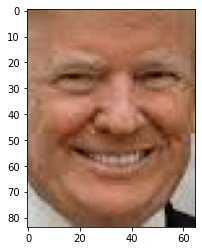

In [10]:
img = cv2.imread(paths[1])[:,:,::-1]
plt.imshow(img)

In [11]:
model = load_model(os.path.join(folder_path, 'facenet.h5'))

In [12]:
model.summary()

Model: "inception_resnet_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv2d_1a_3x3 (Conv2D)          (None, 79, 79, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
Conv2d_1a_3x3_BatchNorm (BatchN (None, 79, 79, 32)   96          Conv2d_1a_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_1a_3x3_Activation (Activ (None, 79, 79, 32)   0           Conv2d_1a_3x3_BatchNorm[0][0]    
________________________________________________________________________________

In [13]:
X = np.zeros((len(paths), 160, 160, 3))
for i, path in enumerate(paths):
    img = cv2.imread(path)[:,:,::-1]
    img = cv2.resize(img, (160, 160))
    X[i] = img

In [14]:
def preprocess(imgs):
    for i in range(imgs.shape[0]):
        # standardization
        img = imgs[i]
        mean, std = img.mean(), img.std()
        img = (img - mean) / std
        imgs[i] = img
    return imgs
X = preprocess(X)

In [15]:
embeddings = model.predict(X)

In [16]:
embeddings.shape

(5, 128)

In [17]:
embeddings[0]

array([ 0.3292678 ,  0.22888228,  1.0691191 , -0.23584837,  0.3748754 ,
       -1.0424433 ,  0.5311506 , -1.1479584 ,  0.16794938,  0.25859585,
       -1.5654851 , -0.43536052, -0.52496856,  1.4412339 ,  0.5677419 ,
       -1.2209198 , -3.9346542 ,  0.430202  , -0.7143753 , -0.4010227 ,
        0.6484071 , -1.4447492 ,  1.3755475 ,  0.91611975, -0.7835801 ,
       -0.6825655 , -1.0273169 , -1.2040354 , -0.6789123 ,  1.2214314 ,
        1.089375  ,  0.02854725, -0.7019302 ,  1.6215363 , -0.16352953,
       -0.59550077,  0.9483178 , -1.927072  ,  0.9050295 ,  0.47600308,
        1.5526669 , -0.43895185,  0.28706747, -1.0853477 , -0.5031126 ,
        0.35573742, -0.45092243,  1.0365795 , -1.1686841 ,  0.46554765,
       -1.3930368 ,  0.45909476, -0.24204141,  1.0833625 , -0.457421  ,
        0.00397875, -0.61194456,  0.05543433, -0.49162966,  0.5531013 ,
        0.27722815, -0.33387244, -0.63283783, -0.4761832 , -1.0811385 ,
        0.89429504, -0.3043956 ,  1.1042206 ,  0.30276462,  1.08

In [18]:
names = [path.split('/')[-1].split('.')[0] for path in paths]

In [19]:
names[:10]

['gal_gadot', 'trump', 'tom', 'nicolas-cage', 'yao-ming']

In [20]:
db = {}
db['names'] = names
db['embeddings'] = embeddings

In [21]:
db

{'embeddings': array([[ 3.2926780e-01,  2.2888228e-01,  1.0691191e+00, -2.3584837e-01,
          3.7487540e-01, -1.0424433e+00,  5.3115058e-01, -1.1479584e+00,
          1.6794938e-01,  2.5859585e-01, -1.5654851e+00, -4.3536052e-01,
         -5.2496856e-01,  1.4412339e+00,  5.6774187e-01, -1.2209198e+00,
         -3.9346542e+00,  4.3020201e-01, -7.1437532e-01, -4.0102270e-01,
          6.4840710e-01, -1.4447492e+00,  1.3755475e+00,  9.1611975e-01,
         -7.8358012e-01, -6.8256551e-01, -1.0273169e+00, -1.2040354e+00,
         -6.7891228e-01,  1.2214314e+00,  1.0893750e+00,  2.8547248e-02,
         -7.0193022e-01,  1.6215363e+00, -1.6352953e-01, -5.9550077e-01,
          9.4831783e-01, -1.9270720e+00,  9.0502948e-01,  4.7600308e-01,
          1.5526669e+00, -4.3895185e-01,  2.8706747e-01, -1.0853477e+00,
         -5.0311261e-01,  3.5573742e-01, -4.5092243e-01,  1.0365795e+00,
         -1.1686841e+00,  4.6554765e-01, -1.3930368e+00,  4.5909476e-01,
         -2.4204141e-01,  1.0833625e+

In [22]:
with open('/content/drive/My Drive/db.pickle', 'wb') as file:
    pickle.dump(db, file)